## Observations and Insights 

In [50]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset


In [3]:
# preview mouse_metadata
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [4]:
# preview study_results
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [5]:
# merge the two datasets
merged_mouse_data = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left")
merged_mouse_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# view merged data counts
merged_mouse_data.count()

Mouse ID              1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
dtype: int64

In [7]:
# Checking the number of mice in the DataFrame.
print(f'The number of mice in the DataFrame is {len(merged_mouse_data["Mouse ID"].unique())}')

The number of mice in the DataFrame is 249


In [70]:
# view grouped data counts
grp_mouse_data = merged_mouse_data.groupby(["Mouse ID", "Timepoint"])
grp_mouse_data.count().head()

Tumor Volume (mm3)  Metastatic Sites  Drug Regimen  Sex  \
Mouse ID Timepoint                                                            
a203     0                           1                 1             1    1   
         5                           1                 1             1    1   
         10                          1                 1             1    1   
         15                          1                 1             1    1   
         20                          1                 1             1    1   

                    Age_months  Weight (g)  
Mouse ID Timepoint                          
a203     0                   1           1  
         5                   1           1  
         10                  1           1  
         15                  1           1  
         20                  1           1

In [9]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates_ids = merged_mouse_data.loc[merged_mouse_data.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
duplicates_ids

array(['g989'], dtype=object)

In [10]:
# Optional: Get all the data for the duplicate mouse ID. 
merged_mouse_data[merged_mouse_data["Mouse ID"] == "i738"]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
238,i738,0,45.000000,0,Capomulin,Female,23,20
448,i738,5,45.595685,0,Capomulin,Female,23,20
547,i738,10,43.421014,0,Capomulin,Female,23,20
735,i738,15,37.978778,0,Capomulin,Female,23,20
1086,i738,20,38.531136,0,Capomulin,Female,23,20
1287,i738,25,34.973438,0,Capomulin,Female,23,20
1451,i738,30,35.578780,1,Capomulin,Female,23,20
1505,i738,35,36.175953,1,Capomulin,Female,23,20
1738,i738,40,36.843898,2,Capomulin,Female,23,20
1850,i738,45,37.311846,2,Capomulin,Female,23,20


In [71]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_data = merged_mouse_data[merged_mouse_data["Mouse ID"].isin(duplicates_ids)==False]
clean_mouse_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [12]:
# Checking the number of mice in the clean DataFrame.
print(f' The number of nice in the clean DataFrame is now {len(clean_mouse_data["Mouse ID"].unique())}')

 The number of nice in the clean DataFrame is now 248


## Summary Statistics

In [13]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.
summary = clean_mouse_data.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})
summary_final = summary.rename(columns = {"var": "variance", "std": "standard deviation", "sem": "standard error"})
summary_final.round(2)

Tumor Volume (mm3)                                     \
                           mean median variance standard deviation   
Drug Regimen                                                         
Capomulin                 40.68  41.56    24.95               4.99   
Ceftamin                  52.59  51.78    39.29               6.27   
Infubinol                 52.88  51.82    43.13               6.57   
Ketapril                  55.24  53.70    68.55               8.28   
Naftisol                  54.33  52.51    66.17               8.13   
Placebo                   54.03  52.29    61.17               7.82   
Propriva                  52.32  50.45    43.85               6.62   
Ramicane                  40.22  40.67    23.49               4.85   
Stelasyn                  54.23  52.43    59.45               7.71   
Zoniferol                 53.24  51.82    48.53               6.97   

                             
             standard error  
Drug Regimen                 
Capomulin              0.33  
Ceftamin               0.47  
Infubinol              0.49  
Ketapril               0.60  
Naftisol               0.60  
Placebo                0.58  
Propriva               0.54  
Ramicane               0.32  
Stelasyn               0.57  
Zoniferol              0.52

## Bar Plots

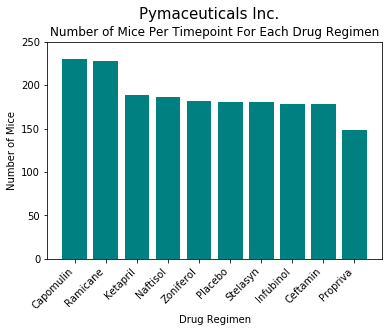

In [14]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas. 
counts_df = clean_mouse_data["Drug Regimen"].value_counts()

x_axis = counts_df.keys()
y_axis = counts_df.tolist()
plt.suptitle("Pymaceuticals Inc.", fontsize=15, y=1)
plt.title("Number of Mice Per Timepoint For Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.bar(x_axis, y_axis, color="teal")
plt.ylim(0,250)
plt.xticks(rotation=45, ha="right")
plt.show()

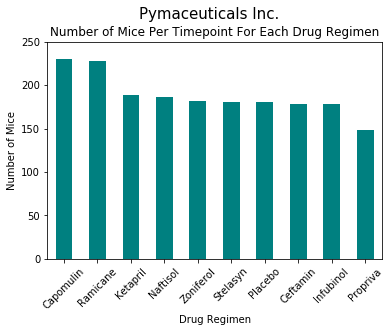

In [68]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.
counts_df.plot(kind="bar", title="Number of Mice Per Timepoint For Each Drug Regimen", color="teal", rot=45)
plt.suptitle("Pymaceuticals Inc.", fontsize=15, y=1)
plt.ylim(0,250)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.show()

## Pie Plots

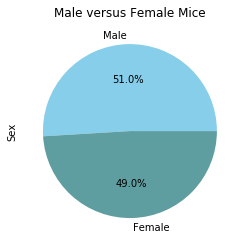

In [102]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_df = clean_mouse_data["Sex"].value_counts()
colors = ["skyblue", "cadetblue"]
gender_df.plot(kind="pie", autopct="%1.1f%%", colors=colors)
plt.title("Male versus Female Mice",loc="center")
plt.show()

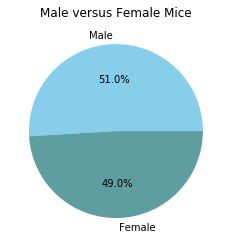

In [54]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
x_axis = gender_df.values
labels = gender_df.keys()
plt.pie(x_axis, labels=labels, autopct="%1.1f%%", colors=colors)
plt.title("Male versus Female Mice", loc="center")
plt.show()

## Quartiles, Outliers and Boxplots

In [69]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
max_df = clean_mouse_data.groupby("Mouse ID").max().reset_index()

merged_data = max_df[["Mouse ID", "Timepoint"]].merge(clean_mouse_data, on=["Mouse ID", "Timepoint"], how="left")

capomulin = merged_data[merged_data["Drug Regimen"] == "Capomulin"]["Tumor Volume (mm3)"]
ramicane = merged_data[merged_data["Drug Regimen"] == "Ramicane"]["Tumor Volume (mm3)"]
infubinol = merged_data[merged_data["Drug Regimen"] == "Infubinol"]["Tumor Volume (mm3)"]
ceftamin = merged_data[merged_data["Drug Regimen"] == "Ceftamin"]["Tumor Volume (mm3)"]

quartiles = capomulin.quantile([.25,.5,.75])
lowerq = quartiles[.25]
upperq = quartiles[.75]
iqr = upperq-lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

capomulin.loc[(capomulin < lower_bound) | (capomulin > upper_bound)]

Series([], Name: Tumor Volume (mm3), dtype: float64)

In [138]:
# view max dataframe
max_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


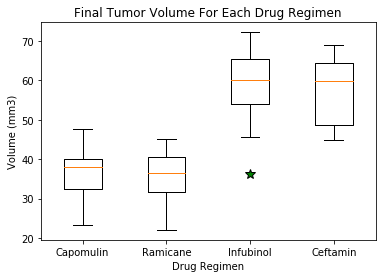

In [81]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
flierprops = dict(marker='*', markerfacecolor='green', markersize=10)
plt.boxplot([capomulin, ramicane, infubinol, ceftamin], labels=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"], flierprops=flierprops)
plt.title("Final Tumor Volume For Each Drug Regimen")
plt.ylabel("Volume (mm3)")
plt.xlabel("Drug Regimen")
plt.show()

## Line and Scatter Plots

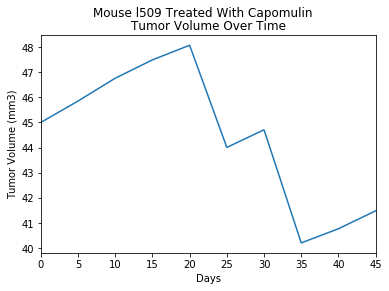

In [103]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_line = clean_mouse_data[clean_mouse_data["Drug Regimen"] == "Capomulin"]
mouse = capomulin_line[capomulin_line["Mouse ID"] == "l509"]

plt.plot(mouse["Timepoint"], mouse["Tumor Volume (mm3)"])
plt.suptitle("Mouse l509 Treated With Capomulin")
plt.title("Tumor Volume Over Time")
plt.xlabel("Days")
plt.ylabel("Tumor Volume (mm3)")
plt.xlim(0, 45)
plt.show()

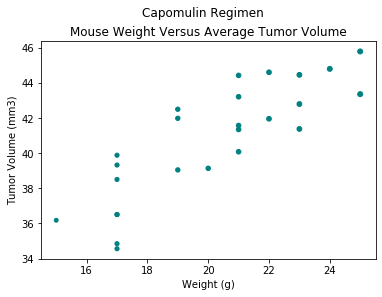

In [120]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
avg_values = capomulin_line.groupby("Mouse ID").mean()
x_axis = avg_values["Weight (g)"]
y_axis = avg_values["Tumor Volume (mm3)"]
plt.scatter(x_axis, y_axis, s=x_axis, color="teal")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.suptitle("Capomulin Regimen", y=1)
plt.title("Mouse Weight Versus Average Tumor Volume")
plt.show()

## Correlation and Regression

In [96]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
correlation = round(st.pearsonr(x_axis,y_axis)[0],2)
print(f'The correlation coefficient is {correlation}')

The correlation coefficient is 0.84


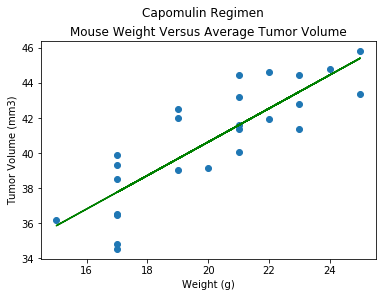

In [122]:
# linear regression model
line = st.linregress(x_axis, y_axis)
plt.scatter(x_axis, y_axis)
y_values = x_axis * line[0] + line[1]
plt.plot(x_axis, y_values, color="green")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.suptitle("Capomulin Regimen", y=1)
plt.title("Mouse Weight Versus Average Tumor Volume")
plt.show()